### ***Principal Component Analysis (PCA)***


First 5 Rows of Dataset:
     Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0  1461          20       RH         80.0    11622   Pave   NaN      Reg   
1  1462          20       RL         81.0    14267   Pave   NaN      IR1   
2  1463          60       RL         74.0    13830   Pave   NaN      IR1   
3  1464          60       RL         78.0     9978   Pave   NaN      IR1   
4  1465         120       RL         43.0     5005   Pave   NaN      IR1   

  LandContour Utilities  ... ScreenPorch PoolArea PoolQC  Fence MiscFeature  \
0         Lvl    AllPub  ...         120        0    NaN  MnPrv         NaN   
1         Lvl    AllPub  ...           0        0    NaN    NaN        Gar2   
2         Lvl    AllPub  ...           0        0    NaN  MnPrv         NaN   
3         Lvl    AllPub  ...           0        0    NaN    NaN         NaN   
4         HLS    AllPub  ...         144        0    NaN    NaN         NaN   

  MiscVal MoSold  YrSold  SaleType  SaleCo

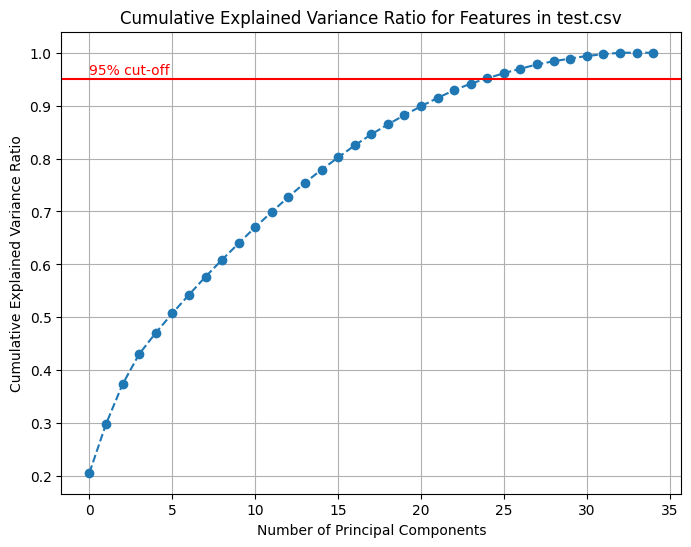


Number of principal components to explain 95% variance: 25

Final PCA Parameters (with selected n_components):
{'copy': True, 'iterated_power': 'auto', 'n_components': np.int64(25), 'n_oversamples': 10, 'power_iteration_normalizer': 'auto', 'random_state': None, 'svd_solver': 'auto', 'tol': 0.0, 'whiten': False}


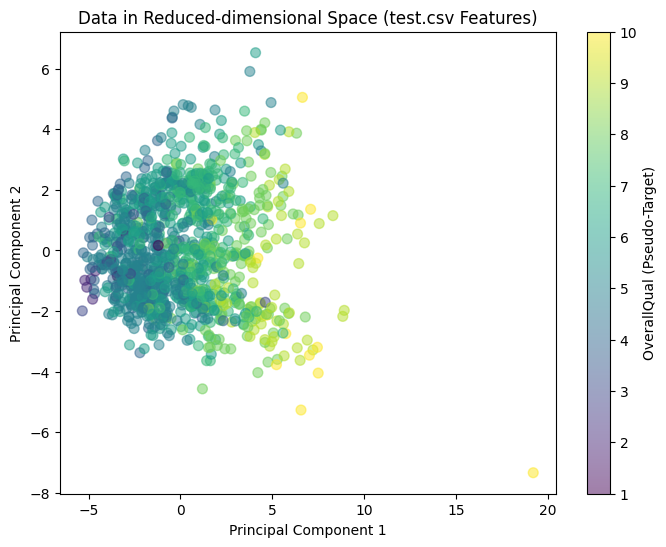


First 5 Rows of PCA Reduced Data:
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -2.174390 -1.812003 -0.680626  0.296320 -0.860222 -0.632197 -0.766745   
1  0.274039 -2.252415 -3.396763 -1.286552  0.122206  0.806433  8.774047   
2  1.150706  0.842448  0.877327 -1.175729 -1.534893 -0.105297  0.126404   
3  1.218340  1.124060  0.840369 -1.186901 -1.474437  0.158195  0.262020   
4 -0.373068 -0.390786  2.360140  1.647705  0.240297  0.593084  1.003815   

        PC8       PC9      PC10  ...      PC17      PC18      PC19      PC20  \
0  0.808647 -0.812595 -0.166434  ... -0.718452  0.139738  0.006226 -0.458626   
1 -2.901316 -7.781771 -0.476947  ... -3.264561 -0.416004 -1.789997 -1.161352   
2  1.837336 -0.691175  0.030974  ... -0.422649  0.583372 -0.849617  0.563717   
3  0.940109 -0.682188  1.163632  ... -0.726077  1.233076 -0.637062  0.355308   
4  1.539757 -0.327731 -1.704677  ... -1.047064 -0.452678 -0.807751 -0.655010   

       PC21      PC22      PC23  

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# Assuming the file '/content/test.csv' is available
df = pd.read_csv("/content/test (1).csv")

print("\nFirst 5 Rows of Dataset:")
print(df.head())
print("Shape: ",df.shape)

# Select only numerical features and drop the 'Id' column
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
# Drop 'Id' as it is an identifier
X = df[numerical_cols].drop('Id', axis=1)

# Handle missing values by dropping rows (simplification for PCA demo)
# This removes any row where *any* of the numerical columns is NaN.
X_clean = X.dropna()

# Align the pseudo-target (OverallQual) with the cleaned features
# Use 'OverallQual' as the pseudo-target for visualization, which is an integer
y = X_clean['OverallQual'].astype(int) # Ensure y is int for coloring
X_clean = X_clean.drop('OverallQual', axis=1)

# Check the cleaned feature set size . Check the first 5 rows of the cleaned feature set
print("\nCleaned Feature Set Shape:")
print(X_clean.shape)
print("\nFirst 5 Rows of Cleaned Features:")
print(X_clean.head())

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_clean)

# Print StandardScaler parameters (as in the original code)
print("\nStandardScaler Parameters:")
print(scaler.get_params())

# Perform PCA (full components)
pca = PCA()
pca.fit(X_scaled)

# Print initial PCA parameters (as in the original code)
print("\nInitial PCA Parameters:")
print(pca.get_params())

# Explained variance ratio
explained_variance_ratio = pca.explained_variance_ratio_

# Plot explained variance ratio
plt.figure(figsize=(8, 6))
plt.plot(np.cumsum(explained_variance_ratio), marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio for Features in test.csv')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.axhline(y=0.95, color='r', linestyle='-')
plt.text(0, 0.96, '95% cut-off', color = 'red', fontsize=10)
plt.grid(True)
plt.show()

# Select the appropriate number of principal components
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)
# The +1 is because argmax returns the *index* (0-based)
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"\nNumber of principal components to explain 95% variance: {n_components}")

# Reduce dimensionality using the selected number of principal components
pca = PCA(n_components=n_components)
X_reduced = pca.fit_transform(X_scaled)

# Print final PCA parameters (after setting n_components)
print("\nFinal PCA Parameters (with selected n_components):")
print(pca.get_params())

# Visualize data in the reduced-dimensional space (using first two components)
plt.figure(figsize=(8, 6))
# Use 'OverallQual' (y) for coloring
scatter = plt.scatter(X_reduced[:, 0], X_reduced[:, 1], c=y, cmap='viridis', s=50, alpha=0.5)
plt.title('Data in Reduced-dimensional Space (test.csv Features)')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.colorbar(scatter, label="OverallQual (Pseudo-Target)")
plt.show()

# Final DataFrame of the reduced data
pca_df = pd.DataFrame(data=X_reduced, columns=[f'PC{i+1}' for i in range(n_components)])
# Add the pseudo-target back
pca_df['OverallQual'] = y.values
pca_df.to_csv('reduced_pca_data.csv', index=False)

print("\nFirst 5 Rows of PCA Reduced Data:")
print(pca_df.head())
print("Shape of PCA Reduced Data:",pca_df.shape)